Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [87]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

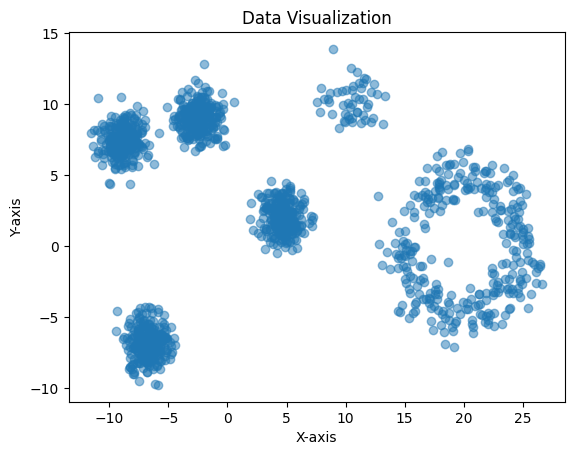

In [88]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Data Visualization")
plt.show()

Imports

In [89]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [90]:
kmeans_clusters = 6
kmeans = KMeans(n_clusters=kmeans_clusters, max_iter=30, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

if len(set(kmeans_labels)) > 1:
    kmeans_score = silhouette_score(X, kmeans_labels)

print("k:", kmeans_clusters)
print("kmeans_score:", kmeans_score)

k: 6
kmeans_score: 0.7251181630059241


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [92]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

egg_best_score = float('-inf')
best_num_clusters = None
best_agglomerative = None

for num_clusters in range(2, 20):
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', metric='euclidean')
    agg_labels = agg_clustering.fit_predict(X)

    score = silhouette_score(X, agg_labels)

    if score > egg_best_score:
        egg_best_score = score
        best_num_clusters = num_clusters
        best_agglomerative = agg_clustering

egg_clusters = best_num_clusters
print(f"Best number of clusters: {egg_clusters}")
print(f"Best silhouette score: {egg_best_score}")


Best number of clusters: 6
Best silhouette score: 0.7256900714288006


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [93]:
dbscan = DBSCAN(eps=1.4, min_samples=7)
dbscan_labels = dbscan.fit_predict(X)

dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if dbscan_clusters > 1:
    dbscan_score = silhouette_score(X, dbscan_labels)

print("num of clusters:", dbscan_clusters)
print("score:", dbscan_score)

num of clusters: 6
score: 0.7222593187874933


6. Compare the results and choose the best method for the data


In [100]:
print("KMeans:")
print("-----------------")
print("KMeans clusters:", kmeans_clusters)
print("Silhouette score:", kmeans_score)
print("-----------------")
print("\n")

print("Agglomerative Clustering:")
print("-----------------")
print("Best number of clusters:", egg_clusters)
print("Best silhouette score:", egg_best_score)
print("-----------------")
print("\n")

print("DBSCAN:")
print("-----------------")
print("DBSCAN clusters:", dbscan_clusters)
print("Silhouette score:", dbscan_score)
print("-----------------")

scores = {
    "KMeans": kmeans_score,
    "Agglomerative": egg_best_score,
    "DBSCAN": dbscan_score
}

best_method = max(scores, key=scores.get)
print("\n")
print(f"=>Best clustering method: {best_method}")

KMeans:
-----------------
KMeans clusters: 6
Silhouette score: 0.7251181630059241
-----------------


Agglomerative Clustering:
-----------------
Best number of clusters: 6
Best silhouette score: 0.7256900714288006
-----------------


DBSCAN:
-----------------
DBSCAN clusters: 6
Silhouette score: 0.7222593187874933
-----------------


=>Best clustering method: Agglomerative
